<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Next-actions-and-TODOs" data-toc-modified-id="Next-actions-and-TODOs-1"><strong>Next actions and TODOs</strong></a></span></li><li><span><a href="#Параметры-для-запуска" data-toc-modified-id="Параметры-для-запуска-2">Параметры для запуска</a></span></li><li><span><a href="#Считывание-изображения" data-toc-modified-id="Считывание-изображения-3">Считывание изображения</a></span></li><li><span><a href="#Предобработка-изображения" data-toc-modified-id="Предобработка-изображения-4">Предобработка изображения</a></span><ul class="toc-item"><li><span><a href="#CLAHE" data-toc-modified-id="CLAHE-4.1">CLAHE</a></span></li><li><span><a href="#Кадрирование" data-toc-modified-id="Кадрирование-4.2">Кадрирование</a></span></li><li><span><a href="#Масштабирование" data-toc-modified-id="Масштабирование-4.3">Масштабирование</a></span></li><li><span><a href="#Фильтрация-изображения" data-toc-modified-id="Фильтрация-изображения-4.4">Фильтрация изображения</a></span></li></ul></li><li><span><a href="#Сегментация-сомы" data-toc-modified-id="Сегментация-сомы-5">Сегментация сомы</a></span><ul class="toc-item"><li><span><a href="#Определение-центра" data-toc-modified-id="Определение-центра-5.1">Определение центра</a></span></li><li><span><a href="#Выделение-сомы" data-toc-modified-id="Выделение-сомы-5.2">Выделение сомы</a></span></li></ul></li><li><span><a href="#Расчет-матрицы-Гессе-для-различных-сигм" data-toc-modified-id="Расчет-матрицы-Гессе-для-различных-сигм-6">Расчет матрицы Гессе для различных сигм</a></span></li><li><span><a href="#Расчет-масок-для-различных-сигм" data-toc-modified-id="Расчет-масок-для-различных-сигм-7">Расчет масок для различных сигм</a></span></li><li><span><a href="#Объединение-результатов-Сато-для-различных-сигм" data-toc-modified-id="Объединение-результатов-Сато-для-различных-сигм-8">Объединение результатов Сато для различных сигм</a></span></li><li><span><a href="#Объединение-собственных-векторов-различных-сигм" data-toc-modified-id="Объединение-собственных-векторов-различных-сигм-9">Объединение собственных векторов различных сигм</a></span></li><li><span><a href="#Построение-графа" data-toc-modified-id="Построение-графа-10">Построение графа</a></span><ul class="toc-item"><li><span><a href="#Выражение-для-весов-ребер" data-toc-modified-id="Выражение-для-весов-ребер-10.1">Выражение для весов ребер</a></span></li><li><span><a href="#Добавление-точек-оболочки-сомы-в-граф" data-toc-modified-id="Добавление-точек-оболочки-сомы-в-граф-10.2">Добавление точек оболочки сомы в граф</a></span></li></ul></li><li><span><a href="#Расчет-путей,-встречаемости-точек-в-путях-и-слияние-графов-по-путям" data-toc-modified-id="Расчет-путей,-встречаемости-точек-в-путях-и-слияние-графов-по-путям-11">Расчет путей, встречаемости точек в путях и слияние графов по путям</a></span><ul class="toc-item"><li><span><a href="#Building-all-paths-at-once,-using-the-&quot;best-scale&quot;-full-graph" data-toc-modified-id="Building-all-paths-at-once,-using-the-&quot;best-scale&quot;-full-graph-11.1">Building all paths at once, using the "best-scale" full graph</a></span></li><li><span><a href="#Converting-paths-to-directed-graphs,-merging-and-visualizing-the-graphs" data-toc-modified-id="Converting-paths-to-directed-graphs,-merging-and-visualizing-the-graphs-11.2">Converting paths to directed graphs, merging and visualizing the graphs</a></span></li></ul></li><li><span><a href="#Добавление-сопутствующей-информации" data-toc-modified-id="Добавление-сопутствующей-информации-12">Добавление сопутствующей информации</a></span></li><li><span><a href="#Распределения-встречаемостей-по-сигме" data-toc-modified-id="Распределения-встречаемостей-по-сигме-13">Распределения встречаемостей по сигме</a></span><ul class="toc-item"><li><span><a href="#Визуализация" data-toc-modified-id="Визуализация-13.1">Визуализация</a></span></li></ul></li><li><span><a href="#Сохранение" data-toc-modified-id="Сохранение-14">Сохранение</a></span></li></ul></div>

# **Next actions and TODOs**
 - [ ] Test performance on other cells
 - [ ] Test performace of the approach with more sigma steps (log scale is preferred, i.e. `2.0**np.arange(-1,5,0.5)`)
 - [ ] Think about a way to regularize vector orientations, using orientations of the neighbours, or at different scales
 - [-] Find a best way to skeletonize the qstack-based arrays and masks (as one of the approaches)
 - [X] Find a way to "glue" together paths, that a close-by and have a similar direction
 - [ ] Visualize different sub-trees in the merged paths (add individually to napari?)
 - [ ] add way to gradually strip/simplify (sub-)graphs for better visualization
 

In [1]:
import os
import sys

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

In [3]:
import cv2

In [4]:
import scipy
from scipy import ndimage as ndi
import numpy as np
import networkx as nx

from pathlib import Path

In [5]:
import napari

In [6]:
from tqdm.auto import tqdm

In [7]:
import ccdb
import astromorpho as astro

Can't load imreg package, affine and homography registrations won't work


/home/levtg/astro-morpho/venv/lib64/python3.10/site-packages/imfun/external/tifffile.py:7261: UserWarning: No module named 'imfun.external._tifffile'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/home/levtg/astro-morpho/venv/lib64/python3.10/site-packages/imfun/external/czifile.py:146: UserWarning: ImportError: No module named '_czifile'. Decoding of JXR and JPEG encoded images will not be available. Czifile.pyx can be obtained at http://www.lfd.uci.edu/~gohlke/
  warnings.warn(
2022-06-15 20:16:33.142695: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/levtg/astro-morpho/venv/lib/python3.10/site-packages/cv2/../../lib64:/home/levtg/v3d_external/v3d_main/common_lib/lib/
2022-06-15 20:16:33.142715: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dler

In [8]:
from networx2napari import draw_edges, draw_nodes

In [9]:
def eu_dist(p1, p2):
    return np.sqrt(np.sum([(x - y)**2 for x, y in zip(p1, p2)]))

In [10]:
from collections import defaultdict

def count_points_paths(paths):
    acc = defaultdict(int)
    for path in paths:
        for n in path:
            acc[n] += 1
    return acc

In [11]:
def get_shell_mask(mask, do_skeletonize=False, as_points=False):
    out = ndi.binary_erosion(mask)^mask
    if do_skeletonize:
        out = skeletonize(out)
    if as_points:
        out = astro.morpho.mask2points(out)
    return out 

In [12]:
from skimage.filters import threshold_li, threshold_minimum, threshold_triangle
from skimage.morphology import remove_small_objects

In [13]:
def largest_region(mask):
    labels, nlab = ndi.label(mask)
    if nlab > 0:
        objs = ndi.find_objects(labels)
        sizes = [np.sum(labels[o]==k+1) for k,o in enumerate(objs)]
        k = np.argmax(sizes)
        return labels==k+1
    else:
        return mask
        
def crop_image(img, mask=None, margin=0, min_obj_size=0):
    if mask is None:
        mask = img > 0
    if min_obj_size > 0:
        mask = remove_small_objects(mask, min_obj_size)
    if margin > 0:
        mask = ndi.binary_dilation(mask, iterations=margin)
    objs = ndi.find_objects(mask)
    min_bnds = np.min([[sl.start for sl in o] for o in objs],0)
    max_bnds = np.max([[sl.stop for sl in o] for o in objs],0)
    crop = tuple(slice(mn,mx) for mn,mx in zip(min_bnds, max_bnds))
    return img[crop]

In [14]:
plt.rc('figure', dpi=150)

# Параметры для запуска

In [15]:
if os.path.exists('/home/brazhe/yadisk/'):
    data_dir = '/home/brazhe/yadisk/data-shared-comfi/3D-astrocyte-images/selected-for-complexity/'

elif os.path.exists('/home/levtg/astro-morpho'):
    data_dir = '/home/levtg/astro-morpho/data/'
else:
    print("Dont know where to look for the data")

# filename = '3wk-both1-grn-raw.pic'
# filename = '4wk-ly9-raw.pic'
# filename = '2020-12-30 WT1 18month slice1-3 hippo CA1 SR astrocyte lucifer yellow 60X zoom2,5.tif'
filename = '3wk-ly1-raw.pic'
use_clahe = True
sigmas = np.arange(0.5, 8, 0.5)

verbose = True

# Set false to start from console
HANDY = True

# Set true to save output
OUT = False

In [16]:
filename = Path(data_dir).joinpath(filename)
filename

PosixPath('/home/levtg/astro-morpho/data/3wk-ly1-raw.pic')

# Считывание изображения

In [17]:
if HANDY:
    verbose = False
#     filename = '/home/levtg/astro-morpho/data/3wk-ly10-raw.pic'

In [18]:
stack, meta = ccdb.read_pic(filename)
dims = ccdb.get_axes(meta)
dims

[(0.06166667, "Microns'"), (0.06166667, "Microns'"), (0.25, "Microns'")]

In [19]:
if len(dims):
    zoom = (dims[-1][0]/dims[0][0])
else:
    zoom = 4
    
print(zoom)

4.054053834916009


# Предобработка изображения

## CLAHE

In [20]:
clahe = cv2.createCLAHE(clipLimit =2.0, tileGridSize=(8,8))

In [21]:
stack_shape = stack.shape
img_clahe = np.zeros(stack.shape, np.float32)
for k,plane in enumerate(stack):
    img_clahe[k] = clahe.apply(plane)

In [22]:
if verbose:
    wi = napari.view_image(stack, ndisplay=3, scale=(zoom, 1,1), name='raw', colormap='magenta')
    wi.add_image(img_clahe, scale=(zoom,1,1), name='CLAHE',colormap='magenta')

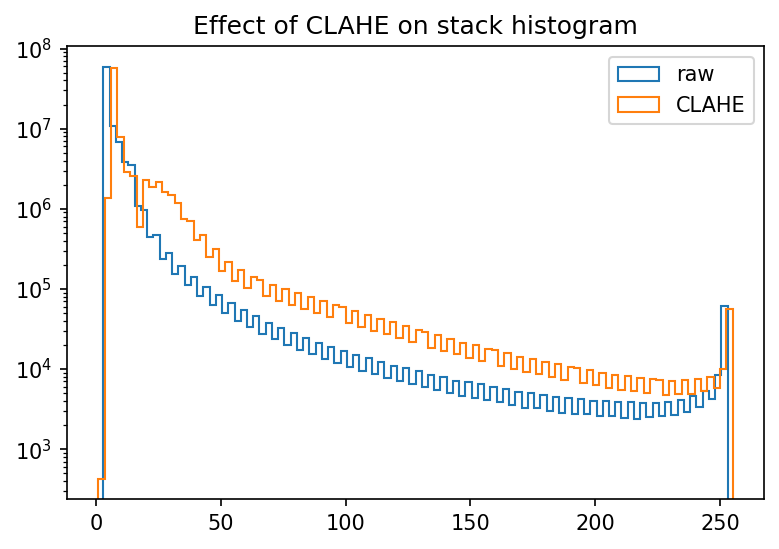

In [23]:
plt.figure()
plt.hist(np.ravel(stack), 100, histtype='step', log=True, label='raw');
plt.hist(np.ravel(img_clahe), 100, histtype='step', log=True, label='CLAHE');
plt.title("Effect of CLAHE on stack histogram")
plt.legend()

In [24]:
# check if use clahe or not
img = img_clahe if use_clahe else stack

## Кадрирование

In [25]:
max_proj = img.max(0)

In [26]:
domain_mask = ndi.binary_dilation(largest_region(remove_small_objects(max_proj > 0.5*threshold_li(max_proj))), iterations=3)
domain_mask = ndi.binary_closing(domain_mask,iterations=3)

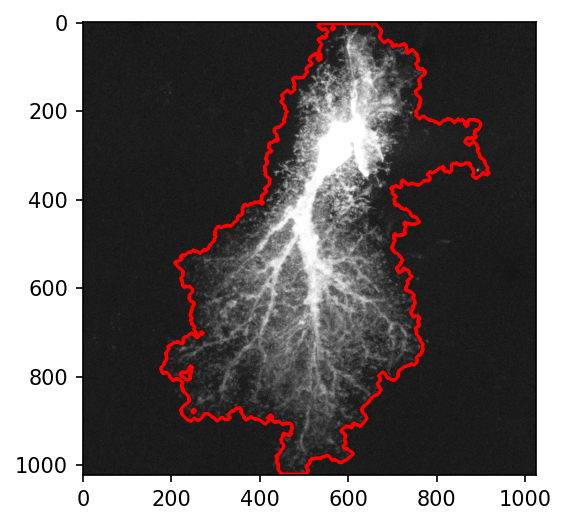

In [27]:
plt.imshow(max_proj, cmap='gray')
plt.contour(domain_mask, colors=['r'], levels=[0.5])

In [28]:
img_cropped = np.array([crop_image(plane,domain_mask, margin=10) for plane in img])

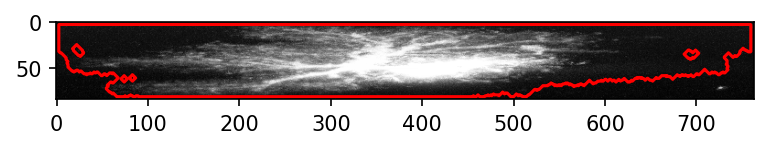

In [29]:
max_proj_1 = img_cropped.max(1)
domain_mask_1 = ndi.binary_dilation(largest_region(remove_small_objects(max_proj_1 > 0.5*threshold_li(max_proj_1))), iterations=3)
domain_mask_1 = ndi.binary_closing(domain_mask_1,iterations=3)
plt.imshow(max_proj_1, cmap='gray')
plt.contour(domain_mask_1, colors=['r'], levels=[0.5])

In [30]:
img_cropped = np.array([crop_image(img_cropped[:,i],domain_mask_1, margin=10) for i in range(img_cropped.shape[1])]).swapaxes(0,1)

In [31]:
if verbose:
    w = napari.view_image(img_cropped)

## Масштабирование

Важный вопрос, как сделать одинаковым масштаб по осям z и xy. Можно downsample XY, можно upsample (by interpolation) Z. Можно комбинировать. В идеале, наверное, XY не трогать, а сделать upsample по Z. 

In [32]:
downscale = 2
%time img_noisy = ndi.zoom(img_cropped.astype(np.float32), (zoom/downscale, 1/downscale, 1/downscale), order=1)

CPU times: user 1.35 s, sys: 48.1 ms, total: 1.39 s
Wall time: 1.4 s


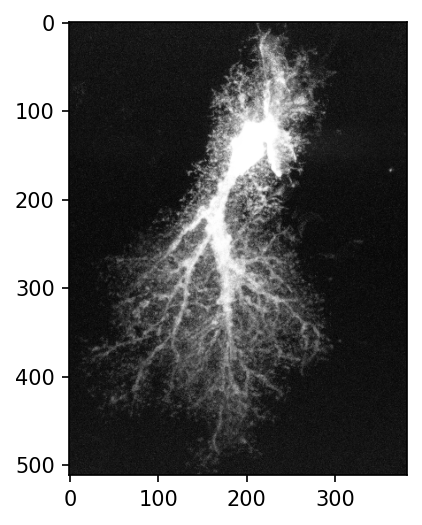

In [33]:
plt.imshow(img_noisy.max(0), cmap='gray')

In [34]:
img.shape, img_noisy.shape

((85, 1024, 1024), (172, 512, 382))

## Фильтрация изображения

In [35]:
def filter_image(image, filter_func):
    threshold = filter_func(image)
    #img_filt = np.where(image > threshold, image, 0)
    pre_mask = ndi.binary_closing(image >= threshold)
    pre_mask = remove_small_objects(pre_mask, 5, connectivity=3)
    binary_clean = largest_region(pre_mask)
    return np.where(binary_clean, image, 0)

In [36]:
img_clear = filter_image(img_noisy, threshold_li)

In [37]:
final_image = img_clear
final_image.shape

(172, 512, 382)

In [38]:
domain_mask3d = ndi.binary_fill_holes(final_image > 0)
domain_shell_mask = get_shell_mask(domain_mask3d)

In [39]:
def planewise_fill_holes(mask):
    for k,plane in enumerate(mask):
        mask[k] = ndi.binary_fill_holes(plane)
    return mask

    
domain_mask3d = planewise_fill_holes(domain_mask3d)

domain_mask3d = np.moveaxis(domain_mask3d, 1, 0)   
domain_mask3d = planewise_fill_holes(domain_mask3d)
domain_mask3d = np.moveaxis(domain_mask3d, 0, 1)


domain_mask3d = np.moveaxis(domain_mask3d, 2, 0)
domain_mask3d = planewise_fill_holes(domain_mask3d)
domain_mask3d = np.moveaxis(domain_mask3d, 0, 2)

In [40]:
domain_outer_shell_mask = get_shell_mask(domain_mask3d) & domain_shell_mask

In [41]:
if verbose:
    w = napari.view_image(img_noisy)
    w.add_image(final_image, colormap='magenta', blending='additive')
    w.add_image(domain_shell_mask, colormap='green', blending='additive')
    w.add_image(domain_outer_shell_mask, colormap='red', blending='additive')

# Сегментация сомы

## Определение центра

In [42]:
import itertools as itt

In [43]:
def percentile_rescale(arr, plow=1, phigh=99.5):
    low, high = np.percentile(arr, (plow, phigh))
    if low == high:
        return np.zeros_like(arr)
    else:
        return np.clip((arr-low)/(high-low), 0, 1)

In [44]:
def flat_indices(shape):
    idx = np.indices(shape)
    return np.hstack([np.ravel(x_)[:,None] for x_ in idx])

In [45]:
X1a = flat_indices(final_image.shape)

In [46]:
%time weights_s = percentile_rescale(np.ravel(ndi.gaussian_filter(final_image,5))**2,plow=99.5,phigh=99.99)

CPU times: user 1.67 s, sys: 58.5 ms, total: 1.73 s
Wall time: 1.74 s


In [47]:
center = tuple(map(int, np.sum(X1a*weights_s[:,None],axis=0)/np.sum(weights_s)))
center

(103, 147, 203)

## Выделение сомы

In [48]:
from skimage.morphology import dilation, skeletonize, flood

In [49]:
from astromorpho import morpho

**Альтернативный подход к сегментации сомы**
1. Работаем со сглаженным стеком
2. делаем первичную маску как flood из центра с толерантностью в 10% разницы между максимальным и минимальным значениями в стеке
3. Разрастаем (аналог flood) первичную маску в несколько итераций

In [50]:
#soma_mask = largest_region(np.where(dilation(eroded), True, False))
#soma_mask = largest_region(final_image >= np.percentile(final_image, 99))

smooth_stack = ndi.gaussian_filter(final_image, 3)
tol = (smooth_stack.max() - smooth_stack[final_image>0].min())/10

print('tol:',tol)
%time soma_seed_mask = flood(smooth_stack, center, tolerance=tol)

tol: 25.423612976074217
CPU times: user 32.6 ms, sys: 13.9 ms, total: 46.4 ms
Wall time: 46.4 ms


In [51]:
%time soma_mask = morpho.expand_mask(soma_seed_mask, smooth_stack, iterations = 10)

CPU times: user 1min 14s, sys: 294 ms, total: 1min 15s
Wall time: 1min 15s


In [52]:
if verbose:
    w = napari.view_image(final_image, ndisplay=3, opacity=0.5)
    w.add_image(soma_seed_mask, blending='additive', colormap='cyan')
    w.add_image(soma_mask, blending='additive', colormap='magenta')

In [53]:
%time soma_shell = get_shell_mask(soma_mask, as_points=True)

CPU times: user 3.02 s, sys: 10.9 ms, total: 3.04 s
Wall time: 3.04 s


# Расчет матрицы Гессе для различных сигм

In [54]:
if HANDY:
    sigmas = 2**np.arange(-1, 3, 0.5)

In [55]:
id2sigma = {i+1:sigma for i, sigma in enumerate(sigmas)} # shift by one, so that zero doesn't correspond to a cell
sigma2id = {sigma:i+1 for i, sigma in enumerate(sigmas)}

In [56]:
sato_coll = {}
Vf_coll = {}

In [57]:
for sigma in tqdm(sigmas):
    #astro.morpho.sato3d is newer and uses tensorflow (if it's installed)
    #optimally, the two variants of sato3d should be merged
    sato, Vf = astro.morpho.sato3d(final_image, sigma, hessian_variant='gradient_of_smoothed', do_brightness_correction=False, return_vectors=True)
    sato_coll[sigma] = (sato*sigma**2)*(final_image > 0)
    Vf_coll[sigma] = Vf[...,0][...,::-1]

  0%|          | 0/8 [00:00<?, ?it/s]

2022-06-15 20:18:31.716309: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/levtg/astro-morpho/venv/lib/python3.10/site-packages/cv2/../../lib64:/home/levtg/v3d_external/v3d_main/common_lib/lib/
2022-06-15 20:18:31.716348: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-15 20:18:31.716375: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (almighty): /proc/driver/nvidia/version does not exist
2022-06-15 20:18:31.726453: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the

In [58]:
lengths_coll = {sigma: astro.enh.percentile_rescale(sato)**0.5 for sigma, sato in sato_coll.items()}
vectors_coll = {}

In [59]:
for sigma in Vf_coll:
    Vfx = Vf_coll[sigma]
    V = Vfx[..., 0]
    U = Vfx[..., 1]
    C = Vfx[..., 2]
    lengths = lengths_coll[sigma]
    vectors_coll[sigma] = np.stack((U*lengths, V*lengths, C*lengths), axis=3)

# Расчет масок для различных сигм

In [60]:
from ucats import masks as umasks

In [68]:
masks = {}
for sigma in tqdm(sigmas):
    sato = sato_coll[sigma]
    threshold = threshold_li(sato[sato>0])*sigma**0.5
    masks[sigma] = remove_small_objects(sato > threshold, min_size=int(sigma*64))

  0%|          | 0/8 [00:00<?, ?it/s]

In [69]:
masks[sigmas[-1]] = umasks.select_overlapping(masks[sigmas[-1]], soma_mask)

In [70]:
for k in range(len(sigmas)-2,-1,-1):
    sigma = sigmas[k]
    masks[sigma] = umasks.select_overlapping(masks[sigma], ndi.binary_dilation(masks[sigmas[k+1]], iterations=5))

Определение оптимальной сигмы

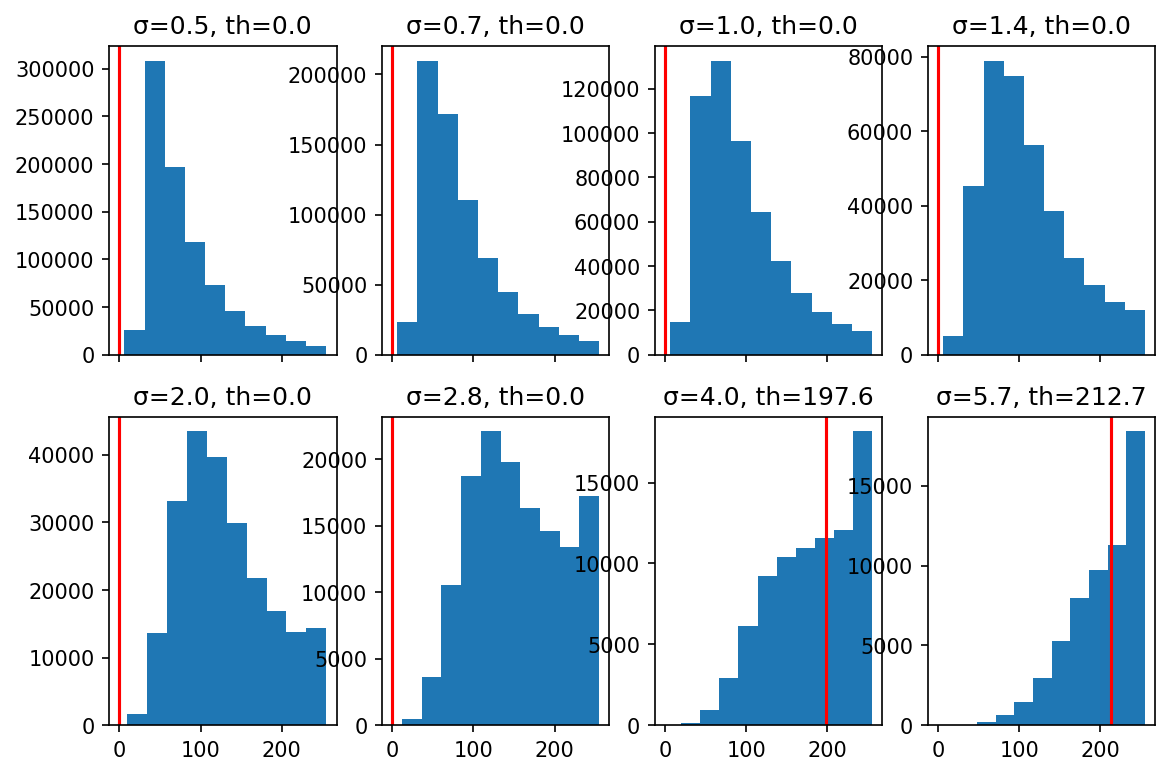

In [72]:
fig, axs = plt.subplots(2,4, figsize=(9,6), sharex=True)
mask_threshs = {}

for ax, sigma in zip(np.ravel(axs), sigmas):
    lightness = final_image[masks[sigma]]
    if sigma < 3:
        th = 0
    else:
        th = -threshold_li(-lightness)
    mask_threshs[sigma] = th
    ax.set_title(f'σ={sigma :0.1f}, th={th:0.1f}')
    ax.hist(lightness)
    ax.axvline(th, color='red')

In [73]:
for sigma, mask in masks.items():
    masks[sigma] = remove_small_objects((final_image > mask_threshs[sigma]) & masks[sigma], 5, connectivity=3)

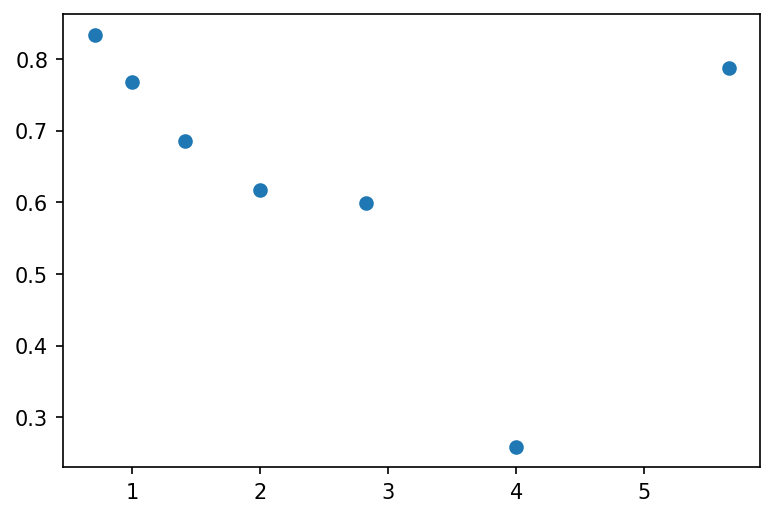

In [75]:
squares = np.array([np.sum(mask) for mask in masks.values()])
# Клетка-убийца
plt.scatter(x=sigmas[1:], y=(squares/np.roll(squares,1))[1:])

In [71]:
if verbose:
    w = napari.view_image(final_image, )
    for sigma in sigmas:
        sato = sato_coll[sigma]
        w.add_image(masks[sigma], blending='additive', name=f'σ={sigma:02f}', colormap='red')

# Объединение результатов Сато для различных сигм

In [76]:
sigma_sato = np.zeros(final_image.shape, dtype=int)
hout = np.zeros(final_image.shape)
mask_sum = np.zeros(final_image.shape, dtype=bool)

for sigma, sato in tqdm(sorted(sato_coll.items(), reverse=True)):
# for sigma, sato in tqdm(sorted(sato_coll.items())):
    hcurr = sato
    mask_sum = masks[sigma] | mask_sum
    mask = (hcurr > hout)*mask_sum # restrict search for optimal sigmas by the corresponding mask
    
    hout[mask] = hcurr[mask]
    sigma_sato[mask] = sigma2id[sigma]

  0%|          | 0/8 [00:00<?, ?it/s]

In [77]:
if verbose:
    idx = 10
    w = napari.view_image(final_image)
    w.add_image(sigma_sato==idx)
    w.add_image(masks[id2sigma[idx]])
    w.add_image(sigma_sato)

# Объединение собственных векторов различных сигм

In [78]:
vectors_best = np.zeros(vectors_coll[sigmas[0]].shape)
mask_sum = np.zeros(final_image.shape,bool)
masks_exclusive = {}

for k in range(len(sigmas)-1,-1,-1):
# for k in range(len(sigmas)):
    sigma = sigmas[k]
    mask = masks[sigma]
    if k < len(sigmas)-1:
        mask = mask & (mask ^ mask_sum)
    mask_sum += mask.astype(bool)
    masks_exclusive[sigma] = mask
    vectors_best[mask] = vectors_coll[sigma][mask]

In [79]:
sigma_mask = np.zeros(final_image.shape, dtype=int)
for sigma_id, sigma in id2sigma.items():
    sigma_mask[masks_exclusive[sigma]] = sigma_id

In [80]:
if verbose:    
    w = napari.view_image(final_image, )
    colors = ['red', 'green', 'magenta', 'cyan', 'blue']
    for sigma, color in zip(masks, itt.cycle(colors)):
        w.add_image(masks_exclusive[sigma], blending='additive', name=f'σ={sigma:02f}',colormap=color)

# Построение графа

## Выражение для весов ребер

В качестве весов мы используем dissimilarities (неcхожести между узлами,  расстояния). 

Нам сначала удобнее сформулировать схожести векторов между соседними узлами, потом задать веса ребер как нечто противоположное схожести.

Основной мерой схожести (пока) будет совпадение направлений собственных векторов матрицы Гессе. Кроме того, длины векторов у нас используются из значений vesselness (по Sato, например), а значит, чем длинее оба вектора, тем меньше должен быть вес этой связи (сильнее связь).

Совпадение направлений между векторами $\mathbf u$ и $\mathbf{v}$ рассчитывается как cosine similarity:

\begin{equation}
S_{uv} = S(\mathbf{u},\mathbf{v}) = 
\frac{\mathbf{u}\cdot \mathbf{v}}
     {\lVert \mathbf{u} \lVert \lVert \mathbf{v} \lVert}
\end{equation}

Поскольку у нас, формально, вектора могут оказаться разнонаправленными, мы должны использовать абсолютное значение $\lvert S \lvert$.


Итак, финальное выражение для веса ребер:
\begin{equation}
W_{ij} := 1 - \left[(1-\alpha)\lvert S^H_{ij} \lvert + \alpha \lvert S^E_{ij} \lvert \right]\frac{N_{ij}}{\max{N_{ij}}},
\end{equation}

Или (сейчас используется этот вариант)

\begin{equation}
W_{ij} := 1 - \lvert S^H_{ij} \lvert + \lvert S^E_{ij} \lvert^\alpha\frac{N_{ij}}{\max{N_{ij}}},
\end{equation}

где $N_{ij}$ — средняя норма Hessian-based векторов в узлах, нормированная на максимальное значение. $S^H_{ij}$ — cosine similarity направлений векторов в соседних узлах, $S^E_{ii}$ — cosine similarity между ориентацией Hessian-вектора в узле $i$ и ориентацией ребра между узлами $i$ и $j$.

Можно предложить как минимум, два варианта объединения масштабов:
 1. [ ] "Best" -- это где вектора в каждом вокселе взяты из соответствующих масок для разных масштабов, потом все это сведено в один граф, и во всем графе
         ищется путь до поверхности сомы. **NOTE:** по идее, маски должны быть "исключительными", то есть каждая область может принадлежать только одной сигме.
 2. [ ] "Combined" -- скелет и пути задаются итеративно от больших масштабов к маленьким, то есть используется свой граф для каждого масштаба и пути ищутся в дополнение к уже найденым. 
       Кстати, можно сделать лучше (предположительно), если вектора из qstack_mask старшего масштаба добавлять к графу меньшего масштаба и опять искать пути до сомы. Тогда будут дополнительно 
       "тренироваться" пути вдоль больших веток. 
       Потом можно брать просто сумму qstacks для разных масштабов, маску можно брать как объединение всех масок на разных уровнях или снова как надпороговые пиксели. 

In [81]:
def prep_crops():
    "makes list of crops for edges"
    num2slice = {1: (slice(1,None), slice(None,-1)), 
                 0: (slice(None), slice(None)), 
                -1: (slice(None,-1), slice(1,None))}
    shifts = list(itt.product(*[(-1,0,1)]*3))
    # we only need one half of that
    cut = int(np.ceil(len(shifts)/2))
    crops_new = [list(zip(*[num2slice[n] for n in tuple])) for tuple in shifts[cut:]]
    return crops_new

In [82]:
def tensor_cosine_similarity(U, V, return_norms=False):
    "Calculate cosine similarity between vectors stored in the last dimension of some tensor"
    
    dprod = np.einsum('...ij,...ij->...i', U, V)
    
    #norm_U = np.linalg.norm(U, axis=-1)
    #norm_V = np.linalg.norm(V, axis=-1)
    
    # don't know why, but this is faster than linalg.norm
    norm_U = np.sum(U**2, axis=-1)**0.5
    norm_V = np.sum(V**2, axis=-1)**0.5
    
    normprod = norm_U*norm_V
    
    out = np.zeros(U.shape[:-1], dtype=np.float32)
    nonzero = normprod>0
    out[nonzero] = dprod[nonzero]/normprod[nonzero]
    
    if return_norms:
        return out, (norm_U, norm_V)
    else:
        return out

def calc_edges(U, V, index1, index2, alpha=0.0, do_threshold=True, return_W=False, verbose=False):
    
    # cовпадение направлений из Гессиана
    Sh, (normU,normV) = tensor_cosine_similarity(U,V, return_norms=True)
    Sh = np.abs(Sh)
    
    # совпадение направления из Гессиана и направления к соседу
    Se = tensor_cosine_similarity(U, index2-index1, return_norms=False)
    Se = np.abs(Se)
    
    N = (normU + normV)/2
    N /= N.max()
    
    #W = 1 - N*((1 - alpha)*Sh + alpha*Se)
    W = 1 - N*(Sh * Se**alpha)
    
    
    if return_W:
        return W
    
    Wflat = W.ravel()
    cond = Wflat < 1
    Sx = 1-Wflat[cond]
    #thresholds = [1-threshold_minimum(Sx),
    #              1-threshold_li(Sx),
    #              1-threshold_triangle(Sx)
    #             ]
    #th = np.max(thresholds)
    th = 1 - (threshold_li(Sx))
    #li = threshold_li(Wflat) if do_threshold else W.max()
    th = th if do_threshold else W.max()
    Wgood = Wflat < th
    
    if verbose:
        print('Thresholding done')
        print('Threshold: ', th)
        print('Max, min:', Wflat.max(), Wflat.min())
        print('% supra-threshold', 100*np.sum(Wgood)/len(Wflat))
    
    idx1 = (tuple(i) for i in index1.reshape((-1, index1.shape[-1]))[Wgood])
    idx2 = (tuple(i) for i in index2.reshape((-1, index2.shape[-1]))[Wgood])
    
    return zip(idx1, idx2,  Wflat[Wgood])
    
    

In [83]:
i, j, k = np.indices(final_image.shape)
idx = np.stack((i,j,k), axis=3)
idx.shape

(172, 512, 382, 3)

In [84]:
crops = prep_crops()

In [85]:
alpha = 0.0
vectors = vectors_best
graph = nx.Graph()
for crop, acrop in tqdm(crops):
         graph.add_weighted_edges_from(calc_edges(vectors[crop], vectors[acrop], idx[crop], idx[acrop], alpha=alpha))

  0%|          | 0/13 [00:00<?, ?it/s]

## Добавление точек оболочки сомы в граф

In [86]:
def get_mask_vals(idxs, mask):
    idx_mask = mask[idxs[:,0], idxs[:,1], idxs[:,2]]
    return idxs[idx_mask]

In [87]:
def get_edges(mask, index1, index2, weight):
    idx1 = [tuple(i) for i in get_mask_vals(index1.reshape((-1, index1.shape[-1])), mask)]
    idx2 = [tuple(i) for i in get_mask_vals(index2.reshape((-1, index2.shape[-1])), mask)]
    return zip(idx1, idx2, np.full(len(idx1), weight))

In [88]:
Gsoma = nx.Graph()

In [89]:
soma_shell_mask = get_shell_mask(soma_mask)

In [90]:
for crop, acrop in tqdm(crops):
    Gsoma.add_weighted_edges_from(get_edges(soma_shell_mask, idx[crop], idx[acrop], 0.7))

  0%|          | 0/13 [00:00<?, ?it/s]

In [91]:
%%time 

for p1, p2, weight in Gsoma.edges(data=True):
    try:
        old_weight = graph.get_edge_data(p1, p2)['weight']
    except Exception as exc:
        old_weight = 1
    graph.add_edge(p1, p2, weight=min(weight['weight'], old_weight))

CPU times: user 25.9 ms, sys: 993 µs, total: 26.9 ms
Wall time: 26.4 ms


In [92]:
nodes = {n:n for n in graph.nodes()}

# Расчет путей, встречаемости точек в путях и слияние графов по путям

In [93]:
from copy import copy

def find_paths(G, targets, min_count=1, min_path_length=10):
    paths_dict = nx.multi_source_dijkstra_path(G, targets, )
    
    #reverse order of points in paths, so that they start at tips 
    paths_dict = {path[-1]:path[::-1] for path in paths_dict.values() if len(path) >= min_path_length}
    paths = list(paths_dict.values())
    points = count_points_paths(paths)

    qstack = np.zeros(vectors.shape[:-1])  #Это встречаемость точек в путях
    for p, val in points.items():
        if val >= min_count:
            qstack[p] = np.log(val)
    return qstack, paths_dict

## Building all paths at once, using the "best-scale" full graph

In [94]:
%time qstack, paths_best = find_paths(graph, soma_shell)

CPU times: user 1min 43s, sys: 1.47 s, total: 1min 45s
Wall time: 1min 45s


In [95]:
all_tips = list(paths_best.keys())

In [ ]:
if verbose:
    w = napari.view_image(final_image)
    w.add_image(qstack)

In [97]:
domain_outer_shell_pts = set(astro.morpho.mask2points(domain_outer_shell_mask))
domain_shell_pts = set(astro.morpho.mask2points(domain_shell_mask))

In [98]:
tips = [t for t in tqdm(all_tips) if t in domain_shell_pts]

  0%|          | 0/985653 [00:00<?, ?it/s]

In [99]:
len(tips), len(domain_outer_shell_pts)

(244907, 404016)

In [100]:
tip_paths = [np.array(paths_best[t]) for t in tips]

## Converting paths to directed graphs, merging and visualizing the graphs

In [101]:
def path_to_graph(path):
    "Converts an ordered list of points (path) into a directed graph"
    g = nx.DiGraph()
    root = tuple(path[-1])
    for k,p in enumerate(path):
        tp = tuple(p)
        g.add_node(tp, root=root) 
        if k > 0:
            g.add_edge(tp, tuple(path[k-1]), weight=1)
    return g
    
    
def view_graph(g, viewer, color=None, kind='points', name=None):
    if color is None:
        color = np.random.rand(3)
    pts = np.array(g.nodes)
    
    kw = dict(face_color=color, edge_color=color, blending='translucent_no_depth', name=name)
    if kind == 'points':
        viewer.add_points(pts, size=1, **kw)
    elif kind == 'path':
        viewer.add_shapes(pts, edge_width=0.5, shape_type='path', **kw)
        
    

def get_tips(g):
    return {n for n in g.nodes if len(list(g.successors(n))) == 0}
            
def get_roots(g):
    return {n for n in g.nodes if len(list(g.predecessors(n))) < 1}

def get_branch_points(g):
    return {n for n in gx.nodes if len(list(gx.successors(n))) > 1}            

In [102]:
def batch_compose_all(tip_paths, batch_size=10000):
    graphs = []
    for i, tp in enumerate(tqdm(tip_paths)):
        graphs.append(path_to_graph(tp))
        if i % batch_size == 0:
            gx_all = nx.compose_all(graphs)
            graphs = [gx_all]
    return nx.compose_all(graphs)    

In [ ]:
%time gx_all = batch_compose_all(tip_paths)

  0%|          | 0/244907 [00:00<?, ?it/s]

# Добавление сопутствующей информации

In [ ]:
def get_attrs_by_nodes(G, arr, func=None):
    nodesG = np.array(G.nodes())
    attrs = arr[nodesG[:,0], nodesG[:,1], nodesG[:,2]]
    if func is not None:
        func_vect = np.vectorize(func)
        attrs = func_vect(attrs)
    return {tuple(node): attr for node, attr in zip(nodesG, attrs)}

In [ ]:
def filter_graph(graph, func = lambda node: True ):
    "returns a view on graph for the nodes satisfying the condition defined by func(node)"
    good_nodes = (node for node in graph.nodes if func(graph.nodes[node]))
    return graph.subgraph(good_nodes)

In [ ]:
nx.set_node_attributes(gx_all, 
                       get_attrs_by_nodes(gx_all, sigma_mask, lambda x: id2sigma[x]), 
                       'sigma_mask')

In [ ]:
nx.set_node_attributes(gx_all, 
                       get_attrs_by_nodes(gx_all, sigma_sato, lambda x: id2sigma[x]), 
                       'sigma_opt')

In [ ]:
nx.set_node_attributes(gx_all, 
                       get_attrs_by_nodes(gx_all, qstack), 
                       'occurence')

In [ ]:
occ_acc = {}
for sigma in tqdm(sigmas):
    sub = filter_graph(gx_all, lambda node: node['sigma_mask']==sigma)
    occ_acc[sigma] = np.array([sub.nodes[n]['occurence'] for n in sub.nodes])

In [ ]:
fig, axs = plt.subplots(3,5, figsize=(9,6), sharex=True)
occ_threshs = {}

for ax, sigma in zip(np.ravel(axs), sigmas):
    v_occ = occ_acc[sigma]
    th = threshold_li(v_occ)
    occ_threshs[sigma] = th
    ax.set_title(f'σ={sigma :0.1f}, th={th:0.1f}')
    ax.hist(v_occ, 50)
    ax.axvline(th, color='red')

# Распределения встречаемостей по сигме

Попробуем взать только те пути, где встречаемость больше порога на соотв. сигме

In [ ]:
%time high_occ_subs = [filter_graph(gx_all, lambda node: (node['occurence'] >=th) & (node['sigma_mask']==sigma)) for sigma, th in occ_threshs.items()]
%time high_occurence_graph1  = nx.compose_all(high_occ_subs)

Проблема в том, что в получившимся графе многие ветки оказались отрезанными от сомы. Придется пересчитать пути до поверхности сомы. Но ребер-то между разрезанными ветками нет :) 
ПОэтому перестроим еще раз граф, но уже используя только узлы из графа `high_occurence_graph1`

In [ ]:
high_occurence_graph1a = graph.subgraph(high_occurence_graph1.nodes) # узлы из изначального графа

In [ ]:
filtered_soma_shell = [p for p in soma_shell if p in high_occurence_graph1a]
len(filtered_soma_shell)

In [ ]:
qstack2, filtered_paths = find_paths(high_occurence_graph1a, filtered_soma_shell)

In [ ]:
high_occurence_tips = get_tips(high_occurence_graph1) # Кочики веток из предыдущего графа
len(high_occurence_tips)

In [ ]:
filtered_tips = [t for t in filtered_paths if domain_shell_mask[t] and t in high_occurence_tips]
len(filtered_tips), len(filtered_paths)

Теперь скомпозируем все обратно и запишем атрибуты

In [ ]:
high_occurence_graph1b = nx.compose_all(path_to_graph(filtered_paths[t]) for t in tqdm(filtered_tips))

In [ ]:
nx.set_node_attributes(high_occurence_graph1b, 
                       get_attrs_by_nodes(high_occurence_graph1b, sigma_mask, lambda x: id2sigma[x]), 
                       'sigma_mask')

nx.set_node_attributes(high_occurence_graph1b, 
                       get_attrs_by_nodes(high_occurence_graph1b, sigma_sato, lambda x: id2sigma[x]), 
                       'sigma_opt')

nx.set_node_attributes(high_occurence_graph1b, 
                       get_attrs_by_nodes(high_occurence_graph1b, qstack), 
                       'occurence')

In [ ]:
min_occurence = 6
%time simple_high_occurence_graph = filter_graph(gx_all, lambda node: node['occurence']>=min_occurence)

In [ ]:
%time high_occurence_large_sigma_graph = filter_graph(high_occurence_graph1b, lambda node: node['sigma_mask'] >= 4.5)
%time high_occurence_large_opt_sigma_graph = filter_graph(high_occurence_graph1b, lambda node: node['sigma_opt'] >= 4.5)

## Визуализация

In [ ]:
def graph_to_paths(g, min_path_length=1):
    """
    given a directed graph, return a list of a lists of nodes, collected
    as unbranched segments of the graph
    """

    roots = get_roots(g)
    
    def _acc_segment(root, segm, accx):
        if segm is None:
            segm = []
        if accx is None:
            accx = []
        children = list(g.successors(root))
        
        if len(children) < 1:
            accx.append(segm)
            return
        
        elif len(children) == 1:
            c = children[0]
            segm.append(c)
            _acc_segment(c, segm, accx)
        
        if len(children) > 1:
            #segm.append(root)
            accx.append(segm)
            for c in children:
                _acc_segment(c, [root, c], accx)        
    
    acc = {}
    for root in roots:
        px = []
        _acc_segment(root, [], px)
        acc[root] = [s for s in px if len(s) >= min_path_length]
    return acc


def paths_to_colored_stack(paths, shape, change_color_at_branchpoints=False):
    #colors = np.random.randint(0,255,size=(len(paths),3))
    stack = np.zeros(shape + (3,), np.uint8)
    for root in paths:
        color =  np.random.randint(0,255, size=3)
        for kc,pc in enumerate(paths[root]):
            if change_color_at_branchpoints:
                color = np.random.randint(0,255, size=3)
            for k,p in enumerate(pc):
                #print(k, p)
                stack[tuple(p)] = color
    return stack

In [ ]:
# xpaths_high_occ = graph_to_paths(simple_high_occurence_graph)
# colored_paths_high_occ = paths_to_colored_stack(xpaths_high_occ, 
#                                                 final_image.shape, 
#                                                 change_color_at_branchpoints=False)

In [ ]:
xpaths_high_occ1 = graph_to_paths(high_occurence_graph1b)
colored_paths_high_occ1 = paths_to_colored_stack(xpaths_high_occ1, 
                                                 final_image.shape, 
                                                 change_color_at_branchpoints=False)

In [ ]:
# colored_paths_high_occ2 = paths_to_colored_stack(graph_to_paths(high_occurence_large_sigma_graph,), 
#                                                  final_image.shape, 
#                                                  change_color_at_branchpoints=False)
# colored_paths_high_occ3 = paths_to_colored_stack(graph_to_paths(high_occurence_large_opt_sigma_graph,), 
#                                                  final_image.shape, 
#                                                  change_color_at_branchpoints=False)

In [ ]:
w = napari.view_image(final_image, opacity=0.5, ndisplay=3)
#w.add_image(colored_paths_high_occ1.sum(axis=-1)>0, name='cp-occ1')
# w.add_image(colored_paths_high_occ, channel_axis=3, colormap=['red','green','blue'], name='cp-occ-simple')
w.add_image(colored_paths_high_occ1, channel_axis=3, colormap=['red','green','blue'], name='cp-occ1')
# w.add_image(colored_paths_high_occ2, channel_axis=3, colormap=['red','green','blue'], name='cp-occ+σ_mask')
# w.add_image(colored_paths_high_occ3, channel_axis=3, colormap=['red','green','blue'], name='cp-occ+σ_opt')

In [15]:
# иногда выполнение ячейки подвисает и запускается только если выполнить следующую
# это sham-ячейка для этого 
_=1


# Сохранение

In [1]:
import pickle

In [11]:
tup2str = lambda x: ','.join(list(map(str, x)))
str2tup = lambda x: tuple(map(int, x.split(',')))

In [3]:
# with open('graph_3wk-both1-grn-raw.pic.pickle') as fd:
#     load_graph = pickle.load(fd)


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

In [12]:
# nx.write_gml(simple_high_occurence_graph, 
#              'gx_all_{}'.format(os.path.basename(filename)), 
#              stringizer=tup2str)

NameError: name 'simple_high_occurence_graph' is not defined

In [248]:
load_graph = nx.read_gml('graph_3wk-both1-grn-raw.pic.gml', destringizer=str2tup)

In [249]:
%time xpaths_all = graph_to_paths(load_graph)

CPU times: user 120 ms, sys: 1.09 ms, total: 121 ms
Wall time: 120 ms


In [250]:
%time colored_paths_all = paths_to_colored_stack(xpaths_all, final_image.shape, change_color_at_branchpoints=False)

IndexError: index 86 is out of bounds for axis 0 with size 85

Traceback (most recent call last):
  File "/home/levtg/astro-morpho/venv/lib64/python3.10/site-packages/napari/layers/_layer_actions.py", line 50, in _split_stack
    images = stack_utils.stack_to_images(layer, axis)
  File "/home/levtg/astro-morpho/venv/lib64/python3.10/site-packages/napari/layers/utils/stack_utils.py", line 236, in stack_to_images
    imagelist.append(Image(idata, **imeta))
  File "/home/levtg/astro-morpho/venv/lib64/python3.10/site-packages/napari/layers/image/image.py", line 353, in __init__
    self.interpolation = interpolation
  File "/home/levtg/astro-morpho/venv/lib64/python3.10/site-packages/napari/layers/image/image.py", line 528, in interpolation
    self._interpolation[self._ndisplay] = Interpolation(interpolation)
  File "/home/levtg/astro-morpho/venv/lib64/python3.10/site-packages/napari/utils/misc.py", line 268, in __call__
    return super().__call__(value.lower())
  File "/usr/lib64/python3.10/enum.py", line 385, in __call__
    return cls.__new__(cls

In [91]:
verbose = True

In [251]:
if verbose:
    w = napari.view_image(final_image, ndisplay=3, opacity=0.5)
    #props = {'path-id': ['line'+str(i) for i in np.arange(len(xpaths))]}
    w.add_image(colored_paths_all,  channel_axis=3, colormap=['red','green','blue'], name='cp_all')